In [2]:
import pandas as pd

df = pd.read_csv("../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [3]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Logistic Regresion Model

Model Evaluation with 2 features:
Accuracy: 0.7456905092133941
Recall: 0.7955326460481099
F1 Score: 0.7645170167874507
Selected Features: ['AgeCategory', 'GenHealth']

Model Evaluation with 3 features:
Accuracy: 0.748167228056271
Recall: 0.8035509736540665
F1 Score: 0.768065693430657
Selected Features: ['DiffWalking', 'AgeCategory', 'GenHealth']

Model Evaluation with 4 features:
Accuracy: 0.7487616405785615
Recall: 0.7686139747995419
F1 Score: 0.7604835663014735
Selected Features: ['DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth']

Model Evaluation with 5 features:
Accuracy: 0.7489597780859917
Recall: 0.7764413898434517
F1 Score: 0.7624671916010499
Selected Features: ['PhysicalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth']

Model Evaluation with 6 features:
Accuracy: 0.7538141470180305
Recall: 0.7741504390988927
F1 Score: 0.7654554034922133
Selected Features: ['Stroke', 'PhysicalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth']

Model Evaluation wit

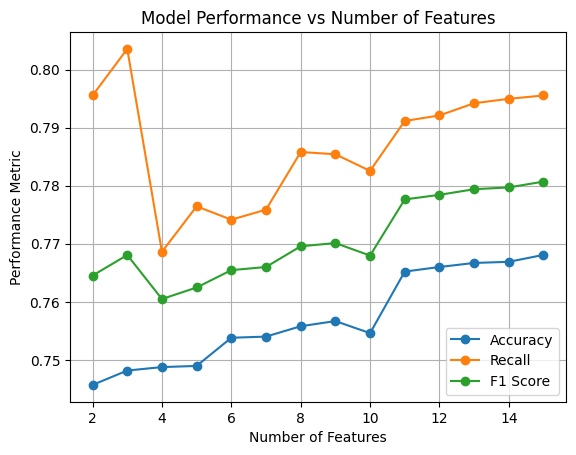

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Define the range of feature numbers you want to try
feature_numbers_to_try = range(2, 16)

# Lists to store results
accuracy_scores = []
recall_scores = []
f1_scores = []

for num_features in feature_numbers_to_try:
    # Feature selection
    selector = SelectKBest(score_func=mutual_info_classif, k=num_features)
    x_selected = selector.fit_transform(x, y)

    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)

    # Logistic Regression model
    modelLogistic = LogisticRegression(max_iter=500)
    modelLogistic.fit(x_train, y_train)

    # Make predictions for the test data
    y_pred = modelLogistic.predict(x_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print model evaluation
    print(f"Model Evaluation with {num_features} features:")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Selected Features: {list(x.columns[selector.get_support()])}\n")

    # Store the metrics
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot the results
plt.plot(feature_numbers_to_try, accuracy_scores, marker='o', label='Accuracy')
plt.plot(feature_numbers_to_try, recall_scores, marker='o', label='Recall')
plt.plot(feature_numbers_to_try, f1_scores, marker='o', label='F1 Score')

plt.title('Model Performance vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Performance Metric')
plt.legend()
plt.grid(True)
plt.show()
